In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('house_price.csv')

In [54]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [76]:
#Q1

In [11]:
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [13]:
print(df.dtypes)

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [15]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [17]:
print(f"Shape of the dataset: {df.shape}")

print(df.info())


Shape of the dataset: (13200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


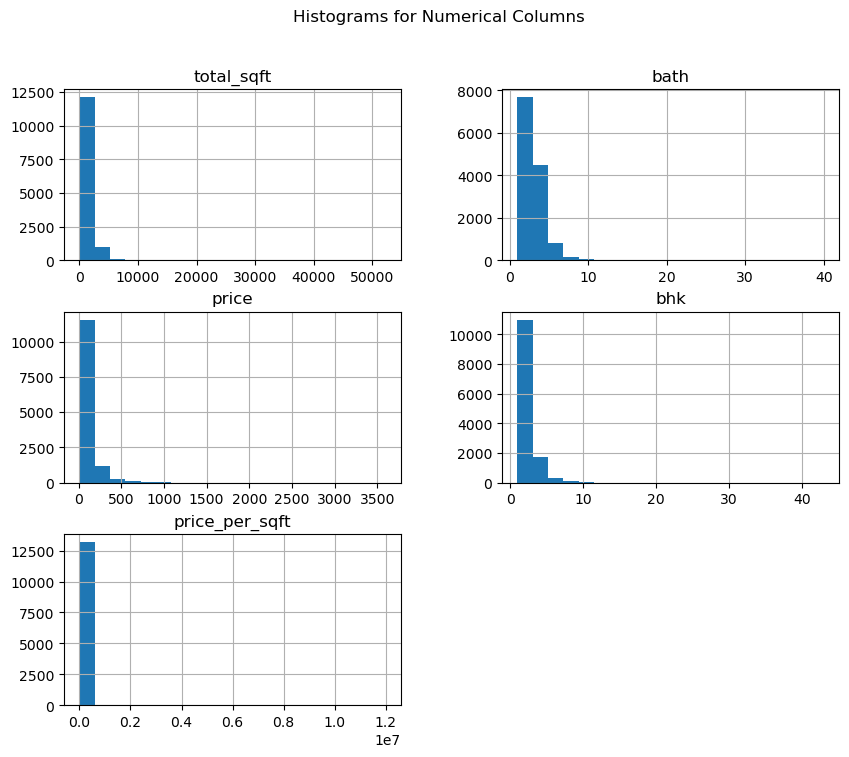

In [21]:

df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms for Numerical Columns')
plt.show()


In [58]:
#Q2
#mean and standard deviation method
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

threshold = 2


outliers = df[(df['price_per_sqft'] < mean - threshold * std_dev) | 
              (df['price_per_sqft'] > mean + threshold * std_dev)]


# 1. Trimming: 
df_trimmed = df[~df.isin(outliers)].dropna()

# 2. Capping: 
df_capped = df.copy()
df_capped['price_per_sqft'] = np.where(df_capped['price_per_sqft'] < mean - threshold * std_dev, 
                                        mean - threshold * std_dev, df_capped['price_per_sqft'])
df_capped['price_per_sqft'] = np.where(df_capped['price_per_sqft'] > mean + threshold * std_dev, 
                                        mean + threshold * std_dev, df_capped['price_per_sqft'])

# 3. Imputation: 
df_imputed = df.copy()
df_imputed['price_per_sqft'] = np.where((df_imputed['price_per_sqft'] < mean - threshold * std_dev) | 
                                        (df_imputed['price_per_sqft'] > mean + threshold * std_dev), 
                                        mean, df_imputed['price_per_sqft'])


print("\nOutliers Detected (Mean and Std Dev Method):\n", outliers)
print("\nTrimmed Data (Mean and Std Dev Method):\n", df_trimmed)
print("\nCapped Data (Mean and Std Dev Method):\n", df_capped)
print("\nImputed Data (Mean and Std Dev Method):\n", df_imputed)



Outliers Detected (Mean and Std Dev Method):
              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333

Trimmed Data (Mean and Std Dev Method):
                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07  2.0   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00  4.0   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00  3.0   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00  3.0   
4                      Kothanur      2 BHK      1200

In [62]:
#percentile method
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Detect outliers (values below lower_percentile or above upper_percentile)
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | 
                         (df['price_per_sqft'] > upper_percentile)]

# Handling outliers: Trimming, Capping, or Imputation
# 1. Trimming: Remove rows with outliers
df_trimmed_percentile = df[~df.isin(outliers_percentile)].dropna()

# 2. Capping: Replace outliers with percentile values
df_capped_percentile = df.copy()
df_capped_percentile['price_per_sqft'] = np.where(df_capped_percentile['price_per_sqft'] < lower_percentile, 
                                                   lower_percentile, df_capped_percentile['price_per_sqft'])
df_capped_percentile['price_per_sqft'] = np.where(df_capped_percentile['price_per_sqft'] > upper_percentile, 
                                                   upper_percentile, df_capped_percentile['price_per_sqft'])

# 3. Imputation: Replace outliers with the median of the data
median = df['price_per_sqft'].median()
df_imputed_percentile = df.copy()
df_imputed_percentile['price_per_sqft'] = np.where((df_imputed_percentile['price_per_sqft'] < lower_percentile) | 
                                                   (df_imputed_percentile['price_per_sqft'] > upper_percentile),
                                                   median, df_imputed_percentile['price_per_sqft'])

# Display results
print("\nOutliers Detected (Percentile Method):\n", outliers_percentile)
print("\nTrimmed Data (Percentile Method):\n", df_trimmed_percentile)
print("\nCapped Data (Percentile Method):\n", df_capped_percentile)
print("\nImputed Data (Percentile Method):\n", df_imputed_percentile)



Outliers Detected (Percentile Method):
                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
20              Kengeri      1 BHK       600.0   1.0   15.0    1   
41       Sarjapur  Road      3 BHK      1254.0   3.0   38.0    3   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
...                 ...        ...         ...   ...    ...  ...   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   
13199      Doddathoguru      1 BHK       550.0   1.0   17.0    1   

       price_per_sqft  
7               18181  
9               36274  
20               2500  
41               3030  
45              33333 

In [64]:
#IQR method 
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

df_trimmed_iqr = df[~df.isin(outliers_iqr)].dropna()

df_capped_iqr = df.copy()
df_capped_iqr['price_per_sqft'] = np.where(df_capped_iqr['price_per_sqft'] < lower_bound, lower_bound, df_capped_iqr['price_per_sqft'])
df_capped_iqr['price_per_sqft'] = np.where(df_capped_iqr['price_per_sqft'] > upper_bound, upper_bound, df_capped_iqr['price_per_sqft'])

df_imputed_iqr = df.copy()
df_imputed_iqr['price_per_sqft'] = np.where((df_imputed_iqr['price_per_sqft'] < lower_bound) | (df_imputed_iqr['price_per_sqft'] > upper_bound),
                                            median, df_imputed_iqr['price_per_sqft'])

print("\nOutliers Detected (IQR Method):\n", outliers_iqr)
print("\nTrimmed Data (IQR Method):\n", df_trimmed_iqr)
print("\nCapped Data (IQR Method):\n", df_capped_iqr)
print("\nImputed Data (IQR Method):\n", df_imputed_iqr)



Outliers Detected (IQR Method):
                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
7               18181  
9               36274  
22              13571  
45              33333  
48              16250  
...  

In [66]:
#Z-score method
from scipy import stats

z_scores = stats.zscore(df['price_per_sqft'])

threshold_z = 3

outliers_zscore = df[np.abs(z_scores) > threshold_z]

df_trimmed_zscore = df[np.abs(z_scores) <= threshold_z]

df_capped_zscore = df.copy()
df_capped_zscore['price_per_sqft'] = np.where(np.abs(z_scores) > threshold_z, threshold_z, df_capped_zscore['price_per_sqft'])

df_imputed_zscore = df.copy()
df_imputed_zscore['price_per_sqft'] = np.where(np.abs(z_scores) > threshold_z, mean, df_imputed_zscore['price_per_sqft'])

print("\nOutliers Detected (Z-Score Method):\n", outliers_zscore)
print("\nTrimmed Data (Z-Score Method):\n", df_trimmed_zscore)
print("\nCapped Data (Z-Score Method):\n", df_capped_zscore)
print("\nImputed Data (Z-Score Method):\n", df_imputed_zscore)



Outliers Detected (Z-Score Method):
              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333

Trimmed Data (Z-Score Method):
                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00  

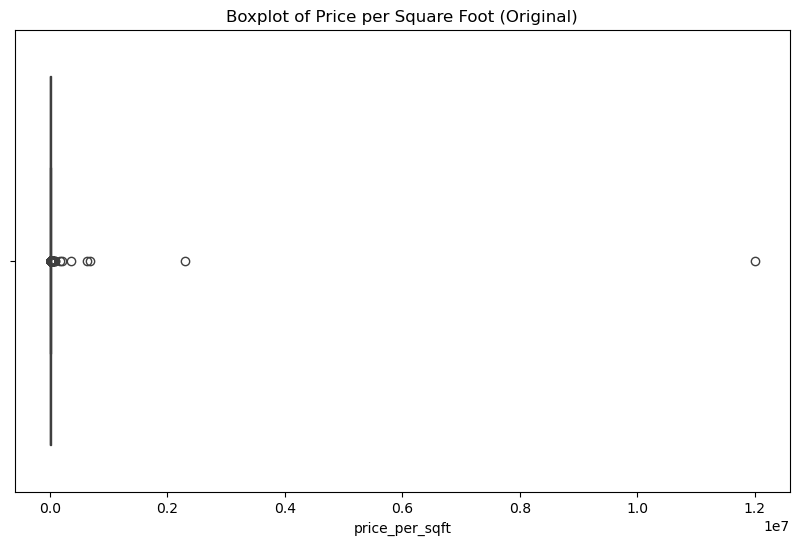

In [60]:
#Q3
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_per_sqft')
plt.title('Boxplot of Price per Square Foot (Original)')
plt.show()


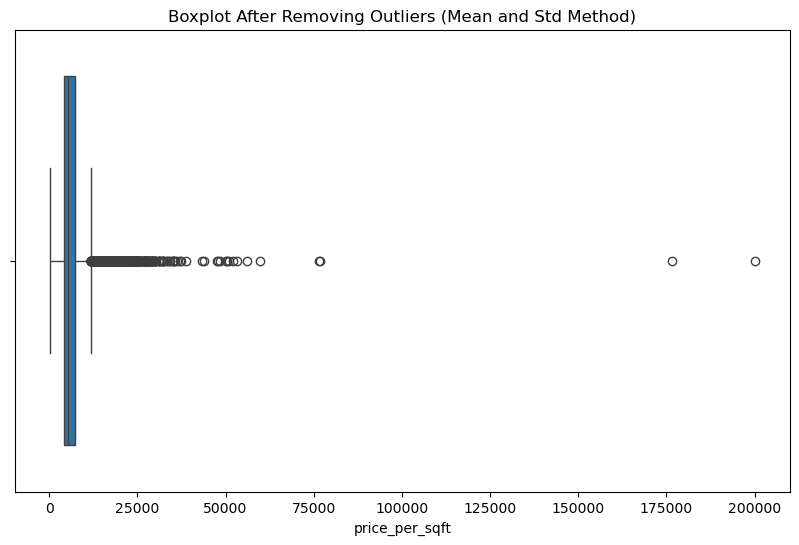

In [68]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

threshold = 2

df_mean_std_removed = df[(df['price_per_sqft'] >= mean - threshold * std_dev) & 
                         (df['price_per_sqft'] <= mean + threshold * std_dev)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mean_std_removed, x='price_per_sqft')
plt.title('Boxplot After Removing Outliers (Mean and Std Method)')
plt.show()


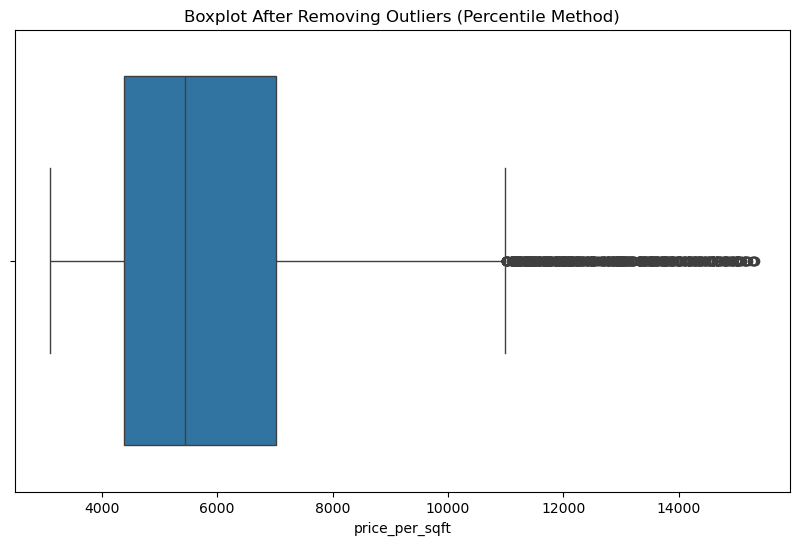

In [70]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

df_percentile_removed = df[(df['price_per_sqft'] >= lower_percentile) & 
                           (df['price_per_sqft'] <= upper_percentile)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_percentile_removed, x='price_per_sqft')
plt.title('Boxplot After Removing Outliers (Percentile Method)')
plt.show()


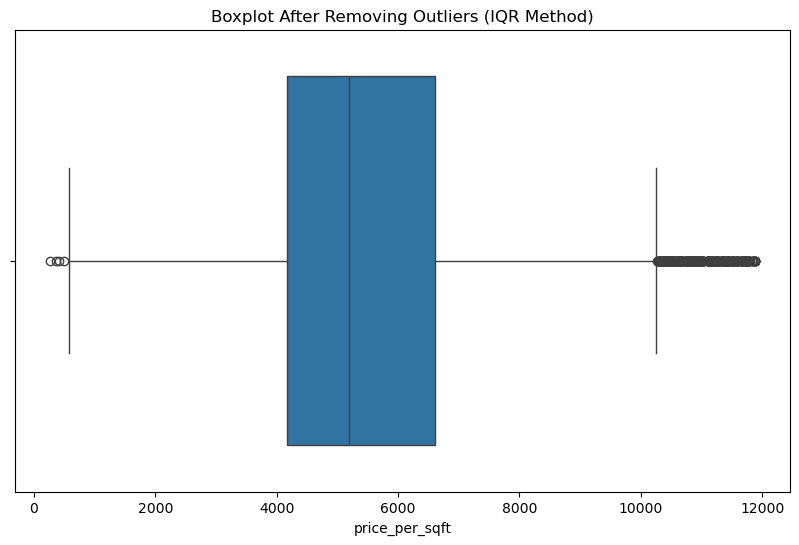

In [72]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_removed = df[(df['price_per_sqft'] >= lower_bound) & 
                    (df['price_per_sqft'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iqr_removed, x='price_per_sqft')
plt.title('Boxplot After Removing Outliers (IQR Method)')
plt.show()


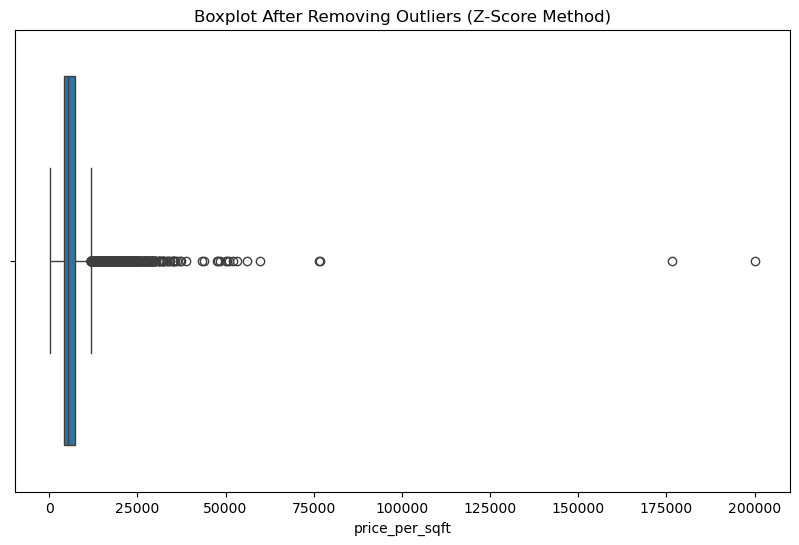

In [74]:
z_scores = stats.zscore(df['price_per_sqft'])

threshold_z = 3

df_zscore_removed = df[np.abs(z_scores) <= threshold_z]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_zscore_removed, x='price_per_sqft')
plt.title('Boxplot After Removing Outliers (Z-Score Method)')
plt.show()


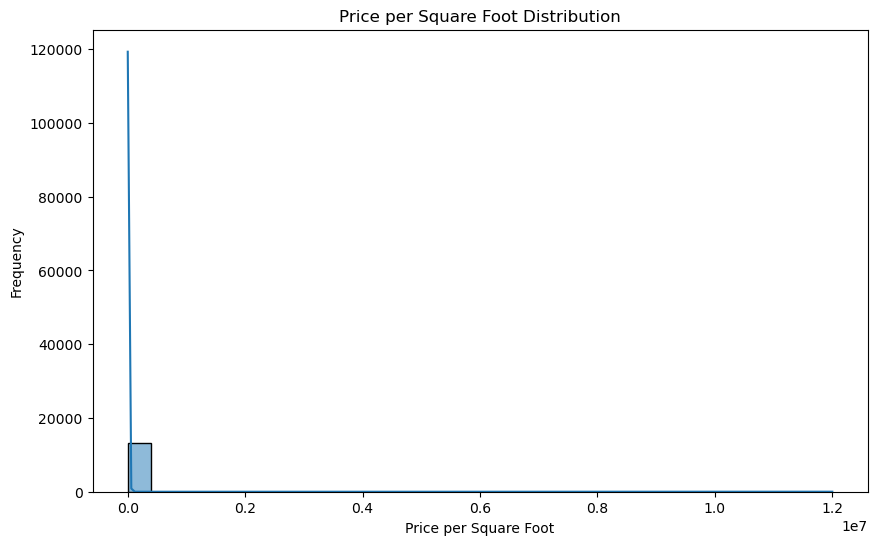

In [78]:
#Q4
# Plot the histogram to check the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()


In [82]:
from scipy.stats import skew, kurtosis
# Check skewness and kurtosis before transformation
pre_skewness = skew(df['price_per_sqft'])
pre_kurtosis = kurtosis(df['price_per_sqft'])

print(f"Skewness before transformation: {pre_skewness}")
print(f"Kurtosis before transformation: {pre_kurtosis}")


Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


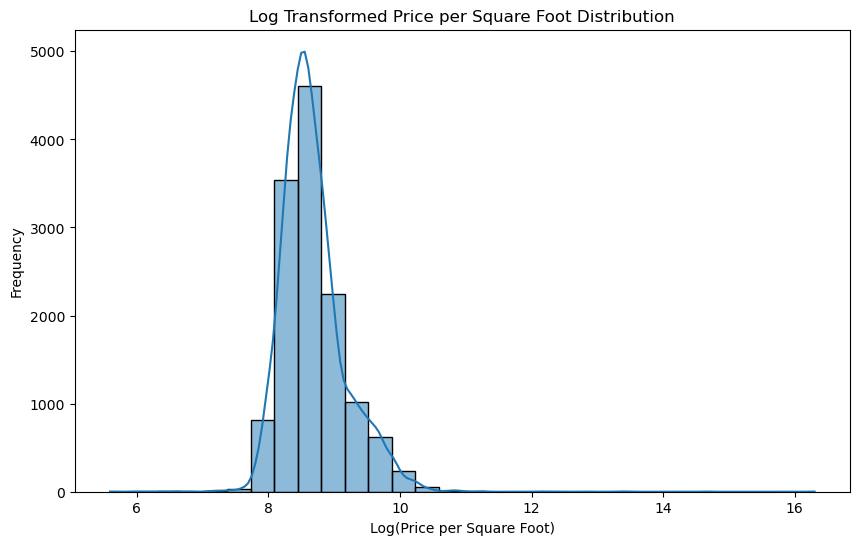

In [84]:
df['price_per_sqft_log'] = np.log(df['price_per_sqft'] + 1)  # Adding 1 to handle zero values

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30)
plt.title('Log Transformed Price per Square Foot Distribution')
plt.xlabel('Log(Price per Square Foot)')
plt.ylabel('Frequency')
plt.show()


In [86]:
# Check skewness and kurtosis after transformation
post_skewness = skew(df['price_per_sqft_log'])
post_kurtosis = kurtosis(df['price_per_sqft_log'])

print(f"Skewness after transformation: {post_skewness}")
print(f"Kurtosis after transformation: {post_kurtosis}")


Skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


Numerical columns: Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft',
       'price_per_sqft_log'],
      dtype='object')


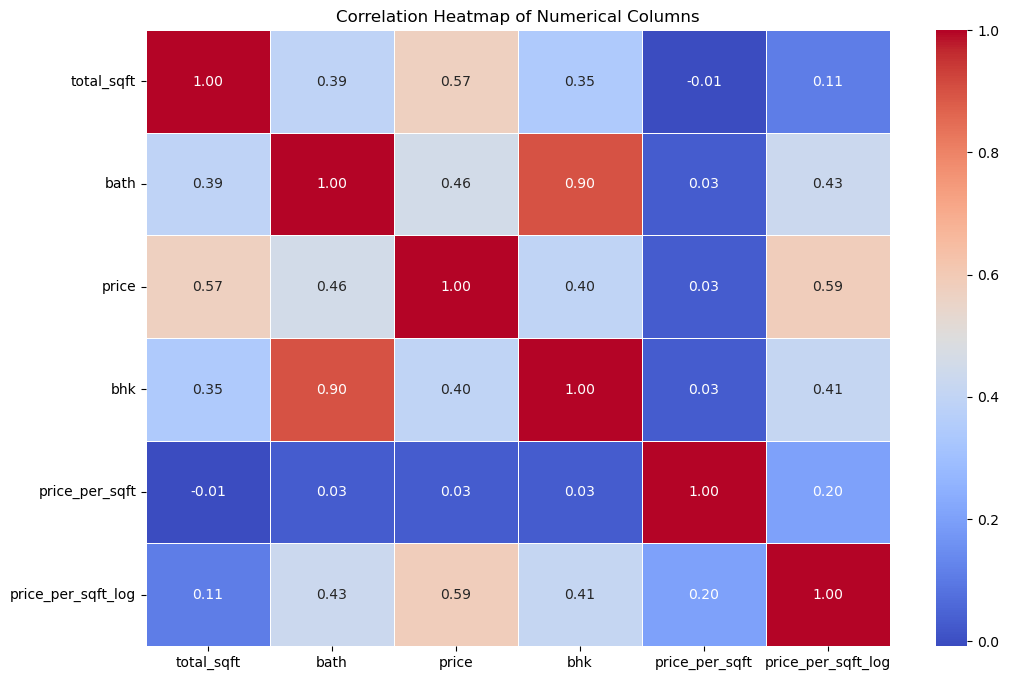

In [88]:
#Q5
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_columns)

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


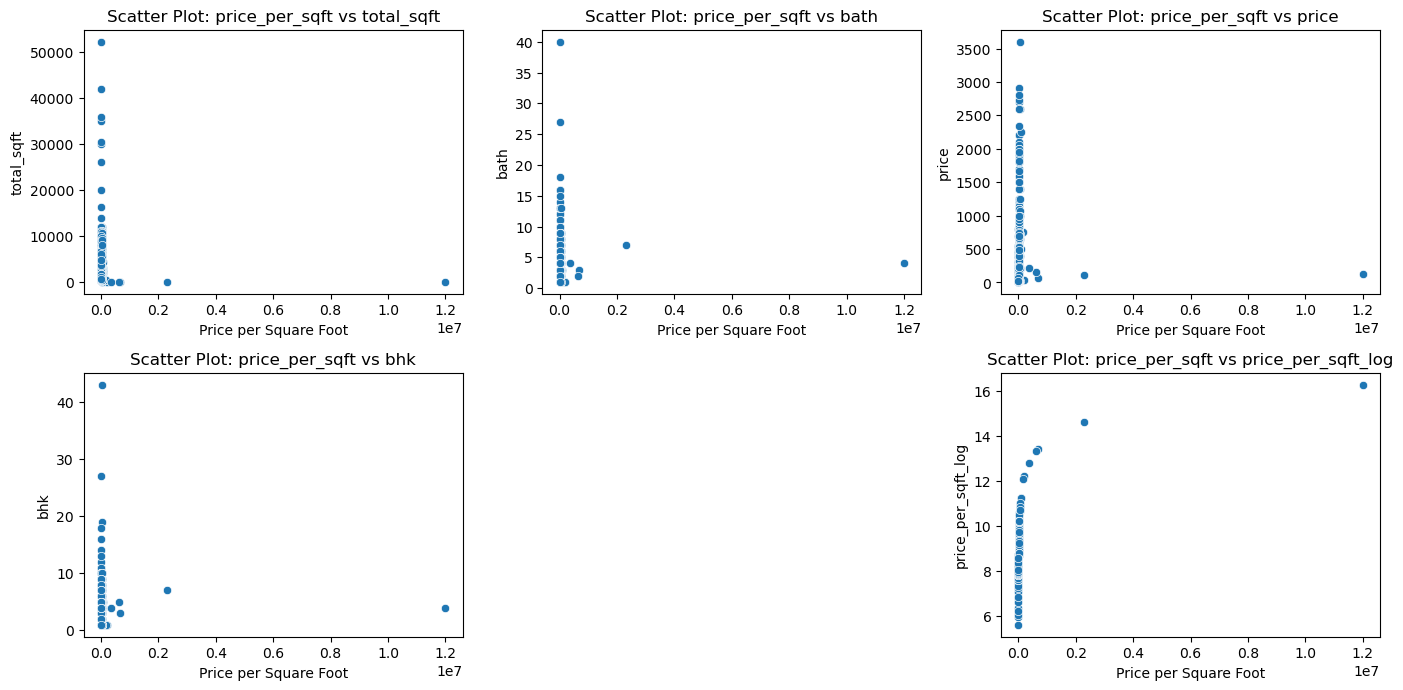

In [90]:
#Q6
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_columns):
    if col != 'price_per_sqft':  # Skip if the column is 'price_per_sqft'
        plt.subplot(3, 3, i+1)  # Adjust the grid size as per the number of columns
        sns.scatterplot(x=df['price_per_sqft'], y=df[col])
        plt.title(f'Scatter Plot: price_per_sqft vs {col}')
        plt.xlabel('Price per Square Foot')
        plt.ylabel(col)

plt.tight_layout()  # To adjust subplots to fit into the figure area.
plt.show()
